In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/match-making/test (1).csv


In [2]:
df = pd.read_csv("../input/match-making/test (1).csv")
df.head()

,id,name,age,angkatan,gender,looking_for_partner,hobbies,interests,xata.createdAt,xata.updatedAt,xata.version
0,rec_cq2iokrtlf0u2vlfs7e0,finally to,18,24,male,True,"[""sports"",""golf"",""swim""]","[""politics"",""game""]",2024-07-03T10:47:47.165022Z,2024-07-03T11:07:48.812423Z,17
1,rec_cq2iokrtlf0u2vlfs7eg,abdicate er,17,24,female,False,"[""travel"",""writing""]","[""music"",""language""]",2024-07-03T10:47:47.165022Z,2024-07-03T11:09:14.227559Z,10
2,rec_cq2iokrtlf0u2vlfs7f0,gutter hourly,17,24,male,True,"[""travel"",""cooking"",""reading""]","[""art"",""game"",""history"",""movies""]",2024-07-03T10:47:47.165022Z,2024-07-03T11:11:30.062533Z,12
3,rec_cq2iokrtlf0u2vlfs7fg,brightly solid,18,24,female,True,"[""swim"",""code"",""writing""]","[""politics"",""history""]",2024-07-03T10:47:47.165022Z,2024-07-03T11:07:58.014051Z,18
4,rec_cq2iokrtlf0u2vlfs7g0,mint king,18,23,female,True,"[""sports"",""reading""]","[""art"",""language"",""movies""]",2024-07-03T10:47:47.165022Z,2024-07-03T11:11:24.499794Z,14


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   50 non-null     object
 1   name                 50 non-null     object
 2   age                  50 non-null     int64 
 3   angkatan             50 non-null     int64 
 4   gender               50 non-null     object
 5   looking_for_partner  50 non-null     bool  
 6   hobbies              50 non-null     object
 7   interests            50 non-null     object
 8   xata.createdAt       50 non-null     object
 9   xata.updatedAt       50 non-null     object
 10  xata.version         50 non-null     int64 
dtypes: bool(1), int64(3), object(7)
memory usage: 4.1+ KB


In [4]:
mapping = {
    'male': 1,
    'female': 0
}
df['gender'] = df['gender'].map(mapping)


In [5]:
df['hobbies'].value_counts()

hobbies
["travel"]                         5
["sing"]                           4
["dance"]                          3
["writing"]                        2
["gym"]                            2
["code","sing"]                    2
["cooking"]                        2
["sports","reading"]               2
["reading","writing","sports"]     1
["code"]                           1
["sports","swim"]                  1
["reading","writing"]              1
["golf","swim","travel"]           1
["reading","cooking"]              1
["gym cooking"]                    1
["dance","writing"]                1
["gym","sports"]                   1
["soccer","sports"]                1
["code","swim"]                    1
["travel","dance"]                 1
["sports","golf","swim"]           1
["dance","sing"]                   1
["travel","golf","writing"]        1
["travel","writing"]               1
["dance","cooking","travel"]       1
["swim"]                           1
["golf"]                      

In [6]:
import ast

unique_hobbies = set()
for hobbies in df['hobbies']:
    unique_hobbies.update(ast.literal_eval(hobbies))

unique_hobbies = sorted(list(unique_hobbies))

# Create binary vectors for hobbies
def create_hobbies_vector(hobbies, unique_hobbies):
    hobbies_set = set(ast.literal_eval(hobbies))
    return [1 if hobby in hobbies_set else 0 for hobby in unique_hobbies]

hobbies_vectors = df['hobbies'].apply(lambda x: create_hobbies_vector(x, unique_hobbies))

# Create a DataFrame for the binary vectors
hobbies_df = pd.DataFrame(hobbies_vectors.tolist(), columns=unique_hobbies)

# Combine with the original DataFrame (excluding the original hobbies column)
df = df.drop('hobbies', axis=1).join(hobbies_df)
df

,id,name,age,angkatan,gender,looking_for_partner,interests,xata.createdAt,xata.updatedAt,xata.version,...,golf,gym,gym cooking,reading,sing,soccer,sports,swim,travel,writing
0,rec_cq2iokrtlf0u2vlfs7e0,finally to,18,24,1,True,"[""politics"",""game""]",2024-07-03T10:47:47.165022Z,2024-07-03T11:07:48.812423Z,17,...,1,0,0,0,0,0,1,1,0,0
1,rec_cq2iokrtlf0u2vlfs7eg,abdicate er,17,24,0,False,"[""music"",""language""]",2024-07-03T10:47:47.165022Z,2024-07-03T11:09:14.227559Z,10,...,0,0,0,0,0,0,0,0,1,1
2,rec_cq2iokrtlf0u2vlfs7f0,gutter hourly,17,24,1,True,"[""art"",""game"",""history"",""movies""]",2024-07-03T10:47:47.165022Z,2024-07-03T11:11:30.062533Z,12,...,0,0,0,1,0,0,0,0,1,0
3,rec_cq2iokrtlf0u2vlfs7fg,brightly solid,18,24,0,True,"[""politics"",""history""]",2024-07-03T10:47:47.165022Z,2024-07-03T11:07:58.014051Z,18,...,0,0,0,0,0,0,0,1,0,1
4,rec_cq2iokrtlf0u2vlfs7g0,mint king,18,23,0,True,"[""art"",""language"",""movies""]",2024-07-03T10:47:47.165022Z,2024-07-03T11:11:24.499794Z,14,...,0,0,0,1,0,0,1,0,0,0
5,rec_cq2iokrtlf0u2vlfs7gg,stereotype till,18,24,1,True,"[""music""]",2024-07-03T10:47:47.165022Z,2024-07-03T11:06:31.312203Z,7,...,0,0,0,0,0,0,0,0,0,0
6,rec_cq2iokrtlf0u2vlfs7h0,oh not,19,23,0,False,"[""politics"",""art"",""game"",""movies""]",2024-07-03T10:47:47.165022Z,2024-07-03T11:11:22.082485Z,11,...,0,0,0,0,1,0,0,0,0,0
7,rec_cq2iokrtlf0u2vlfs7hg,grotesque yum,18,24,1,True,"[""game"",""history""]",2024-07-03T10:47:47.165022Z,2024-07-03T11:07:55.49732Z,9,...,0,0,0,0,0,0,0,0,1,0
8,rec_cq2iokrtlf0u2vlfs7i0,reassuringly ha,18,24,0,False,"[""movies""]",2024-07-03T10:47:47.165022Z,2024-07-03T11:11:17.854552Z,11,...,0,0,0,0,0,0,0,0,0,1
9,rec_cq2iokrtlf0u2vlfs7ig,ack bob,17,24,1,True,"[""art"",""movies""]",2024-07-03T10:47:47.165022Z,2024-07-03T11:11:35.75618Z,11,...,0,0,0,1,0,0,0,1,0,0


In [7]:
df['interests'].value_counts()

interests
["music"]                             5
["game"]                              4
["politics"]                          3
["game","language"]                   3
["history","movies"]                  3
["game","history"]                    3
["movies"]                            3
["art"]                               3
["music","art","language"]            2
["politics","history"]                2
["language"]                          2
["politics","game"]                   1
["politics","music","art"]            1
["language","movies"]                 1
["movies","art"]                      1
["music","history"]                   1
["politics","game","language"]        1
["history"]                           1
["art","history"]                     1
["music","game","movies"]             1
["music","language"]                  1
["music","art"]                       1
["politics","history","language"]     1
["art","movies"]                      1
["politics","art","game","movi

In [8]:
unique_interests = set()
for interests in df['interests']:
    unique_interests.update(ast.literal_eval(interests))

unique_interests = sorted(list(unique_interests))

def create_interests_vector(interests, unique_interests):
    interests_set = set(ast.literal_eval(interests))
    return [1 if interest in interests_set else 0 for interest in unique_interests]

interests_vectors = df['interests'].apply(lambda x: create_interests_vector(x, unique_interests))

interests_df = pd.DataFrame(interests_vectors.tolist(), columns=unique_interests)
df = df.drop('interests', axis=1).join(interests_df)
df

,id,name,age,angkatan,gender,looking_for_partner,xata.createdAt,xata.updatedAt,xata.version,code,...,swim,travel,writing,art,game,history,language,movies,music,politics
0,rec_cq2iokrtlf0u2vlfs7e0,finally to,18,24,1,True,2024-07-03T10:47:47.165022Z,2024-07-03T11:07:48.812423Z,17,0,...,1,0,0,0,1,0,0,0,0,1
1,rec_cq2iokrtlf0u2vlfs7eg,abdicate er,17,24,0,False,2024-07-03T10:47:47.165022Z,2024-07-03T11:09:14.227559Z,10,0,...,0,1,1,0,0,0,1,0,1,0
2,rec_cq2iokrtlf0u2vlfs7f0,gutter hourly,17,24,1,True,2024-07-03T10:47:47.165022Z,2024-07-03T11:11:30.062533Z,12,0,...,0,1,0,1,1,1,0,1,0,0
3,rec_cq2iokrtlf0u2vlfs7fg,brightly solid,18,24,0,True,2024-07-03T10:47:47.165022Z,2024-07-03T11:07:58.014051Z,18,1,...,1,0,1,0,0,1,0,0,0,1
4,rec_cq2iokrtlf0u2vlfs7g0,mint king,18,23,0,True,2024-07-03T10:47:47.165022Z,2024-07-03T11:11:24.499794Z,14,0,...,0,0,0,1,0,0,1,1,0,0
5,rec_cq2iokrtlf0u2vlfs7gg,stereotype till,18,24,1,True,2024-07-03T10:47:47.165022Z,2024-07-03T11:06:31.312203Z,7,0,...,0,0,0,0,0,0,0,0,1,0
6,rec_cq2iokrtlf0u2vlfs7h0,oh not,19,23,0,False,2024-07-03T10:47:47.165022Z,2024-07-03T11:11:22.082485Z,11,0,...,0,0,0,1,1,0,0,1,0,1
7,rec_cq2iokrtlf0u2vlfs7hg,grotesque yum,18,24,1,True,2024-07-03T10:47:47.165022Z,2024-07-03T11:07:55.49732Z,9,0,...,0,1,0,0,1,1,0,0,0,0
8,rec_cq2iokrtlf0u2vlfs7i0,reassuringly ha,18,24,0,False,2024-07-03T10:47:47.165022Z,2024-07-03T11:11:17.854552Z,11,0,...,0,0,1,0,0,0,0,1,0,0
9,rec_cq2iokrtlf0u2vlfs7ig,ack bob,17,24,1,True,2024-07-03T10:47:47.165022Z,2024-07-03T11:11:35.75618Z,11,0,...,1,0,0,1,0,0,0,1,0,0


In [9]:
data = df.copy()
data.drop('xata.createdAt', axis=1, inplace=True)
data.drop('xata.updatedAt', axis=1, inplace=True)
data.drop('xata.version', axis=1, inplace=True)
data.drop('name', axis=1, inplace=True)
data.head()

,id,age,angkatan,gender,looking_for_partner,code,cooking,dance,golf,gym,...,swim,travel,writing,art,game,history,language,movies,music,politics
0,rec_cq2iokrtlf0u2vlfs7e0,18,24,1,True,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
1,rec_cq2iokrtlf0u2vlfs7eg,17,24,0,False,0,0,0,0,0,...,0,1,1,0,0,0,1,0,1,0
2,rec_cq2iokrtlf0u2vlfs7f0,17,24,1,True,0,1,0,0,0,...,0,1,0,1,1,1,0,1,0,0
3,rec_cq2iokrtlf0u2vlfs7fg,18,24,0,True,1,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
4,rec_cq2iokrtlf0u2vlfs7g0,18,23,0,True,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0


In [10]:
ids = data['id']
rep_id = {id_: i+1 for i, id_ in enumerate(ids)}
data['id'] = df['id'].replace(rep_id)
data.head()

,id,age,angkatan,gender,looking_for_partner,code,cooking,dance,golf,gym,...,swim,travel,writing,art,game,history,language,movies,music,politics
0,1,18,24,1,True,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
1,2,17,24,0,False,0,0,0,0,0,...,0,1,1,0,0,0,1,0,1,0
2,3,17,24,1,True,0,1,0,0,0,...,0,1,0,1,1,1,0,1,0,0
3,4,18,24,0,True,1,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
4,5,18,23,0,True,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0


In [11]:
extra = data['looking_for_partner']
data.drop('looking_for_partner', axis=1, inplace=True)
data.head()

,id,age,angkatan,gender,code,cooking,dance,golf,gym,gym cooking,...,swim,travel,writing,art,game,history,language,movies,music,politics
0,1,18,24,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
1,2,17,24,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,1,0
2,3,17,24,1,0,1,0,0,0,0,...,0,1,0,1,1,1,0,1,0,0
3,4,18,24,0,1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
4,5,18,23,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0


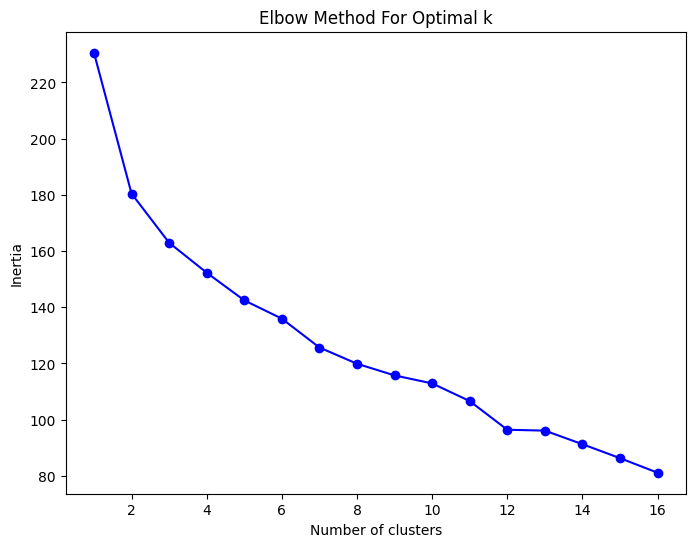

In [12]:
features = data.copy()
features.drop('id',axis=1,inplace=True)
# Determine the optimal number of clusters using the elbow method
inertia = []
K = range(1, 17)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

optimal_clusters = 12

features = data.drop('id', axis=1)
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(features)

# Optional: Visualize the clustering (using PCA for dimensionality reduction)
#pca = PCA(n_components=2)
#principal_components = pca.fit_transform(features)
#pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
#pca_df['cluster'] = data['cluster']
data.head()


,id,age,angkatan,gender,code,cooking,dance,golf,gym,gym cooking,...,travel,writing,art,game,history,language,movies,music,politics,cluster
0,1,18,24,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,1
1,2,17,24,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,1,0,5
2,3,17,24,1,0,1,0,0,0,0,...,1,0,1,1,1,0,1,0,0,3
3,4,18,24,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,6
4,5,18,23,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,11


In [14]:
data['cluster'].value_counts()

cluster
1     7
4     6
8     6
3     5
9     5
6     4
10    4
5     3
2     3
0     3
11    2
7     2
Name: count, dtype: int64

In [15]:
print(data[data['cluster'] == 1])

    id  age  angkatan  gender  code  cooking  dance  golf  gym  gym cooking  \
0    1   18        24       1     0        0      0     1    0            0   
11  12   18        24       1     0        1      0     0    0            0   
14  15   18        24       1     1        0      0     1    0            0   
19  20   18        24       1     0        0      0     1    0            0   
25  26   18        24       1     0        0      0     1    0            0   
33  34   19        24       1     0        0      0     0    0            1   
36  37   17        24       1     0        0      0     1    0            0   

    ...  travel  writing  art  game  history  language  movies  music  \
0   ...       0        0    0     1        0         0       0      0   
11  ...       0        0    0     1        0         0       0      0   
14  ...       0        0    0     0        0         0       0      1   
19  ...       0        0    0     0        0         0       1      0   
25

In [16]:
print(data[data['cluster'] == 11])

    id  age  angkatan  gender  code  cooking  dance  golf  gym  gym cooking  \
4    5   18        23       0     0        0      0     0    0            0   
30  31   18        24       0     0        0      0     0    0            0   

    ...  travel  writing  art  game  history  language  movies  music  \
4   ...       0        0    1     0        0         1       1      0   
30  ...       0        0    0     0        0         1       1      0   

    politics  cluster  
4          0       11  
30         0       11  

[2 rows x 25 columns]


In [17]:
print(data[data['cluster'] == 8])

    id  age  angkatan  gender  code  cooking  dance  golf  gym  gym cooking  \
8    9   18        24       0     0        1      1     0    0            0   
12  13   18        23       0     0        1      0     0    0            0   
22  23   17        24       0     0        1      1     0    0            0   
28  29   18        24       0     0        0      1     0    0            0   
32  33   18        24       0     0        0      1     0    0            0   
43  44   18        24       0     0        0      1     0    0            0   

    ...  travel  writing  art  game  history  language  movies  music  \
8   ...       0        1    0     0        0         0       1      0   
12  ...       0        1    0     0        0         0       1      0   
22  ...       1        0    0     1        0         0       1      1   
28  ...       1        0    0     0        1         0       1      0   
32  ...       0        1    0     1        0         0       0      0   
43  ... 

In [18]:
print(data[data['cluster'] == 6])

    id  age  angkatan  gender  code  cooking  dance  golf  gym  gym cooking  \
3    4   18        24       0     1        0      0     0    0            0   
24  25   18        24       0     0        0      0     0    0            0   
40  41   18        24       0     1        0      0     0    0            0   
48  49   18        24       1     1        0      0     0    0            0   

    ...  travel  writing  art  game  history  language  movies  music  \
3   ...       0        1    0     0        1         0       0      0   
24  ...       0        0    1     0        0         0       0      0   
40  ...       0        0    1     0        0         0       0      0   
48  ...       0        0    1     1        0         0       0      0   

    politics  cluster  
3          1        6  
24         0        6  
40         0        6  
48         0        6  

[4 rows x 25 columns]
